Lecture Notes for session conducted on September 14, 2022

https://www.scaler.com/academy/mentee-dashboard/class/36599/session

**Content**

1.   ADAM (Adaptive Moment Estimation) Optimizer.
2.   Weight Initialization.
3.   Auto Encoders (AE):
     - Dimensionality Reduction using AE.
     - Denoising AE.
     - Misc.

### ADAM (Adaptive Moment Estimation) Optimizer:

There are a lot of optimizers available for DL. The most popular and widely used algorithm is ADAM. So we will deep-dive into ADAM optimizer.

#### Quick Recap: Stochastic Gradient Descent (SGD)

Let's understand working of Stochastic Gradient Descent.

- Imagine we have a mini-batch SGD. In each iteration, we take random subset of $k$ points.
- GD update is computed as:
$$w^k_{ij_{new}} = w^k_{ij_{old}} - \eta \frac{\partial L}{\partial w^k_{ij}} \bigg|_{old}$$
for $t$ such iterations and $\eta$ = learning rate.
  <img src='https://drive.google.com/uc?id=1nodMadzHegJvUKusWjOjCI4pIvwPCq75'>
- In mini-batch, we compute these derivates in back propogation.
- Rather than doing it for all $n$ points, we estimate it for batch of $k$ points.


#### Motivation behind ADAM:

- Imagine we have a contour plot of weights ($w_1$, $w_2$) as shown below plotted against $Loss$. This looks like a paraboloid.
  <img src='https://drive.google.com/uc?id=1fKMFK2ZokNH5JINA2-ssYv7LsCfsStKy'>


- Initially, the weights ($w_1$, $w_2)$ are initialized randomly and we want to move towards minima.
  <img src='https://drive.google.com/uc?id=11iUh7u1f8BiRLigLC_tzE4YSgqJAEmtL'>
- In GD if we have to compute Loss for all $n$ points, we will move perfectly/gradually towards minima. We will move $\perp$ to contour towards minima.
- But in reality, we may not be able to do GD. So, we often do mini batch SGD with $k$ points. Then the derivative we have is not perfect, but an approximation $\frac{\partial \hat{L}}{\partial w^k_{ij}} \bigg|_{old}$


- In SGD, it will not move $\perp$ to contour. It will keep juggling around an eventually move to minima.
  <img src='https://drive.google.com/uc?id=1G3GW--bBaoYFqaSLYH1ds2dgjeQ0rbRj'>

#### Momentum:

- There is an interesting concept behind Momentum.  
  <img src='https://drive.google.com/uc?id=1OW28zRiZk0ONVZf3U-Md_ZqUmm2gPsot'>
- Imagine we have contour like shown in the figure above. The mini-batch gradient descent will eventually take me to minima as shown.
- Let say, we have 100 iterations. $t: 1 \to 100$.
- Idea of momentum is that every step $t$, (for simplicity, we will refer to $\frac{\partial \hat{L}}{\partial w^k_{ij}} \bigg|_{old}$ as $g_t$ @ iteration $t$).
- In each iteration, we have gradient $g_1, g_2,...g_t$.

- In SGD, $w_{new}$ is computed as $w_{old} - \eta* g_t$ for $t: 1 \to 1000$.
  <img src='https://drive.google.com/uc?id=1dLVyY7QCZHd1wOuuzeYC5kanq0Z-e4bM'>
- So idea is can we somehow use past information about gradients $(g_1, g_2,...g_{t-1})$ to better update and faster update as they direct towards minima.


- Let say, we have gradients $g_1, g_2..g_5$ computed and now we want to compute $g_6$. Now that know information about $g_1, g_2..g_5$ we know its net direction.
  <img src='https://drive.google.com/uc?id=1nofueiCTlefRILnKqO-LYT72ihi7n_n1'>
- So now, rather than moving in some random direction, we can move towards minima in a better and faster manner.
- We can say that we are using some sort of weighted average of previous gradients.

***Question:*** How we get direction because we get only numerical values?

***Answer:*** No, its just an intuition we are building.

#### First Lesson Learned:

*Momentum speeds up convergence*

- Older gradients $(g_1, g_2, ..g_{t-1})$ along with $g_t$(with higher weightage to $g_t$) are used.
  <img src='https://drive.google.com/uc?id=1MQWL_V8s9A76tAdW_W8f46n3-Bb5CbmD'>
- This is done using exponential weightage average (EWA). This concept is called $Momentum$.
- So while computing $g_6$, we are using $(g_1,..g_5)$. The momentum is used to move towards minima, which we are using to move faster in that direction.
- Using momentum, it speeds up convergence.



***Question:*** Is my understanding correct -  Each of the $g_t$ is calculated on a different minibatch of size $k$, so each of the $g_t$'s will provide a different estimate of the same population gradient? Which we then aggregate to get estimate of overall gradient.

***Answer:*** $g_2$ is computed using $g_1$. So for each $g_t$, batch is changing and old $g_t$ is changing.

#### What is Saddle point:

- Imagine  we are at a Saddle point. We have $w_1$, $w_2$ as shown in diagram.
  <img src='https://drive.google.com/uc?id=1AR7rp3Fj8P1yS0G1jL0Rfh_De45noL37'>
- Momentum helps us to get out of saddle point.
- But the question would be, how to determine if you are at saddle point?

- We can do higher order derivatives, test. But there is a simpler solution.
  <img src='https://drive.google.com/uc?id=1tvcvOKnBo0_qNp-M-XaCMT5JtXz3U_Ln'>
- Let say, we have $(w^{10}_1, w^{10}_2)$, where derivative becomes 0. Hack here is to add small random delta $(\delta_1, \delta_2)$ and we do it few times.
- If we observe output of $f(w_1, w_2)$ less than minima, it means that we have maxima on one dimension and minima on another. This implies that we are at Saddle point.

***Question:*** So while calculating $W_{ij}$ we give less weightage to other gradients and more weightage to new $g_t$ and then we aggregate?

***Answer:*** Yes, that is correct. This is known as EWA.

***Question:*** Can it be possible that  it converges at local minima instead of global minima because of some discrepancy in momentum calculation?

***Answer:***
- Yes, this happens all the time. In Neural Network/DL, we have loss function that is often non-convex i.e. multiple minima.
  <img src='https://drive.google.com/uc?id=1KvRQBbs6n5aGfBiCAPC0B8OAenwWu1ke'>
- Even if model gets stuck at local minima, its computational complexity is such that we still get better performance. Hence, it is suggested to take multiple random points and compute whichever loss is minimum.

***Question:*** Does initialization of weights affect the momentum or it overcomes the issue during the process?

***Answer:*** Initialization of weights does impact final outcome. Momentum depends on where the random points lie initially. If it lies on a steep curve the momentum is faster than if the point lies on flatter curve, so momentum is slower.

#### ADAM: Algorithm

- We compute gradient $g_t$ at each $t$ and also square of gradient $g^2_t$. $g_t$ itself is used for momentum through EWA and $g^2_t$ is use to adjust learning rate adaptively.
- Initially, learning rate  is $\alpha \to 0.001, \beta_{1} \to 0.9, \beta_{2} \to 0.999, \epsilon
\to 10^{-8}$.
- $\alpha$ in this algorithm refers to $\eta$ in our earlier discussions. $\beta_1$ and $\beta_2 \in (0,1)$ and are exponential decay rate. $f(\theta)$ refers to loss function $L(w)$.
  <img src='https://drive.google.com/uc?id=1mzcm4Z5w9rWBa5j3pLDFRvF4qTb-SjBE'>
- Randomly, initialize $\theta$. Initially, momentum vector $m_0$ is zero and iteration $t$ starts with zero.
- In each iteration $t$, we compute $g_t$ and update $m_t$ as $\beta_1 * m_{t-1} + (1-\beta_1) * g_t$. Notice, that older momentum is getting $90\%$ weightage and $10\%$ to new momentum. The idea is newer momentum is approximation and old momentum we already have done $(t-1)$ iterations. Hence information about $(t-1)$ iterations should have higher weightage.
- Note that each iteration might point in random direction, but all these $(t-1)$ iterations in aggregrate would be pointing in right direction. This is slight contrast to time series, where we gave higher weightage to recent values. Here, we are giving more weightage to older momentum as it will be more likely to point in right direction.
- $\hat{m}_t$ is computed as $m_t/(1-{\beta_1}^t)$ ( read ${\beta_1}^t$ as $\beta_1$ raised to power $t$) as we want to correct for bias term. This is similar to how we calculate variance in statistics using formula $\sigma^2 = \frac{1}{n-1} * \sum ({x_i} - \mu)^2 $. We use $(n-1)$ term to remove bias i.e. correction for bias.
- Update $\theta_t$ as $\theta_{t-1} - \frac{\alpha * \hat{m}_t}{ \sqrt{\hat{v}_t} + \epsilon}$.

*Note:* We will take about denominator term $ \sqrt{\hat{v}_t} + \epsilon$ in a short while.



#### Second Lesson Learned:

*Adjust learning Rate*
- As iteration increases, $\alpha$ should decrease. If the learning rate is not reduced, then we would overshoot.
- $g_t$ could be positve or negative. But $g^2_t$ will always be positive and will be very high. But slowly, gradient will reduce as we come closer to minima.
  <img src='https://drive.google.com/uc?id=1Wow5YdgkVC7PTNRKpHBoRzvnonFvavwZ'>


- In iteration $t$ we are adopting $\alpha$ as
$$\alpha_{adj} = \frac{\alpha}{\sqrt{\sum_{i=1}^t g^2_t} + \epsilon}$$
here $\epsilon \to 10^{-8}$ to avoid divide by zero error.
  <img src='https://drive.google.com/uc?id=1cR-rP-r66sZ3kDqPrUNejQV8Xd89xN6a'>
- As $t$ increases, $\alpha_{adj}$ is always reducing.
- One could argue that why can't we compute $\alpha_{adj}$ as $\frac{\alpha}{t}$. Note that, if gradient at $t$ is large, then we know we have moved faster to minima which means learning rate should reduce more.
- So we want to adjust learning rate base on amount of gradient.

***Question:*** If our gradient $g_i$ lies between 0 to 1, then $g^2_i$ is decreasing, then our logic fails, right?

***Answer:*** Yes this a boundary case. But typically, gradients have very large values.

***Question:*** Why not absolute value of gradient instead of gradient squared? both gives positive value right?

***Answer:*** Yes, it could be used theoretically.

#### Adam: Algorithm continued..

- Now let's look at the $v_0$ momentum vector.
  <img src='https://drive.google.com/uc?id=1pwGp1Z0BBOOylOrPBILFDpBLTcHaGEFr'>
- Initially, $v_0 \to 0$.
- In every iteration $t$, $v_t$ is computed as $\beta_2 * v_{t-1} + (1-\beta_2)*g^2_t$.
- $\hat{v_t}$ is computed as $\frac{v_t}{(1-\beta^t_2)}$.
- Update $\theta_t$ as $\theta_{t-1} - \frac{\alpha * \hat{m}_t}{ \sqrt{\hat{v}_t} + \epsilon}$.

*Note:* Values of $\beta_1, \beta_2$ are arrived at $0.9$ and $0.999$ after a lot of experimentation.



#### Summary:

ADAM has 2 components:
- Exponential Weighted Average (EWA) of $g_t$ that gives ***momentum***.
- Exponential Weighted Average (EWA) of $g^2_t$ that gives ***adjusted learning rate***.
  <img src='https://drive.google.com/uc?id=1fGVnnCz5nISxZnphh9t_ZtGbjBVLYdfU'>


  

### Weight Initialization:

Here are some of the ideas for weight initialization.  
  <img src='https://drive.google.com/uc?id=1MOSnqCGT8cXjAT39MNn4YgPeE3zMoUFm'>
- We could either use Normal Distribution with small $\sigma$ or uniform distribution between $-1$ and $1$.

- One of the strategies used to determine weight initialization is to use strategy of $fan-in$ and $fan-out$.
- For e.g. imagine we have a neuron with 4 inputs and 2 outputs. Then $fan-in \to 4$ and $fan-out \to 2$.
  <img src='https://drive.google.com/uc?id=1uP5u_7BXgD6TH-vybVDiQb7BWWyxoQHN'>


- There are other better strategies that have worked experimentaly but have weak theory supporting it.
- Some of these techniques are Xavier Glorot, He.
  <img src='https://drive.google.com/uc?id=19-jyJd_y34mHbwNT_vJ3p8elH7O-qvGl'>

- Weights could be initialized using uniform distribution as follows:
$$w^k_{ij} \sim Uniform\bigg[ \frac{-1}{\sqrt{fan-in}}, \frac{1}{\sqrt{fan-out}}\bigg]$$  
- These techniques were used around early $2010's$.
  <img src='https://drive.google.com/uc?id=1IR1CIZB68-WPAX_5l6aadn2jTao2mQbG'>

- Glorot initialization states that we could initialization weights using either of following approaches:
  <img src='https://drive.google.com/uc?id=13EGBQPBRbbc_WafqmvOqS5x_4JkH8nm9'>
- Normal Distribution: $w^k_{ij} \sim N(0,\sigma_{ij}), where \sigma_{ij} = \frac{2}{fanin+fanout}$
- Uniform Distribution: $w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin+fanout}}, \frac{\sqrt{6}}{\sqrt{fanin+fanout}}\bigg]$


- He initialization was designed around $2015$. The formula is as follows:
  <img src='https://drive.google.com/uc?id=1Ozm8i15zpHaTuUNjJ1VRINeUsjA1GEvh'>
- Normal Distribution: $N(0,\sigma)$, where $\sigma = \frac{2}{fanin}$
- Uniform Distribution: $Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$



- Keras implementation, weight initializer is *glorot_uniform* and bias is initialized to zero.
  <img src='https://drive.google.com/uc?id=19TEgRqK_Qwxm9EGtzpIWAUJIohpPO4wq'>

### AutoEncoders:

- Suppose we have MNIST dataset where each image is of size $28*28$ which is converted to $784*1$.
- We can somehow pass it to a MLP and get $32-dim$ vector which represents all information in $784- dim$ data.
- This $32-dim$ is again passed through another MLP that will give output of $784-dim$ data which is similar to original data.
  <img src='https://drive.google.com/uc?id=1Kg_J6FvWXP9X9dcnP61g6I1IuipGr2XZ'>


- We do similar thing in PCA, where input $x_i$ is multiplied with matrix of eigen vectors $A$ and we get $32*1$ vector of top eigen values.  
  <img src='https://drive.google.com/uc?id=1ip9etJFbltNhEr-t_X3GJ0l5XT1ju8_C'>


- We can think of PCA as special case of AutoEncoders. This could be thought of intuitively.
  <img src='https://drive.google.com/uc?id=19Mmrwuu7QIdQILEYNJwlZIPgQrwWbL_M'>


***Question:*** How we justify 32 represent original? like what loss we used here?

***Answer:*** If we can somehow recover information about $784$ dimensions from $32$-dim, then we can say that information about $784$ dimensions is compressed into $32$ dim.

- Here, is a simple architecture of an AutoEncoder.
  <img src='https://drive.google.com/uc?id=1a9z0K4hqHXPycK-CKRZf80N4TNaPssXX'>
- Imagine we have MNIST images as input $x_i \in 784$. Note that these images are normalized. So each pixel value is between 0 and 1.
- We have a fully connected layer with $128$ neurons, followed by another fully connected layer with $64$ neurons and another fully connected layer with $32$ neurons. These 3 layers use ReLu activation units. All these 3 layers collectively are known as Encoder.
- The output of Encoder is $32$-dim. This is fed to a series of fully connected layers with $64,128,784$ neurons respectively. Final layer has Sigmoid as activation function.
- We need Sigmoid because input was normalized between 0 to 1 in the beginning.
- If the input values $\approx$ output values, then the loss will be very small.




#### Code: AutoEncoders

In [ ]:
#Source and Reference: https://blog.keras.io/building-autoencoders-in-keras.html

import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

#Normalization of input
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshaping the images to 1D vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

- We have 3 layers in Encoder section. Each with $128,64,32$ neurons and ReLu as activation function.
- Decoder section has 3 layers. First 2 layers has ReLu activation function with $64,128$ neurons with Relu activation. Final layer has $784$ neurons with Sigmoid as activation.
- We are using binary crossentropy, as we want to compare input and output that lies between 0 and 1.

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2425 - val_loss: 0.1643
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1484 - val_loss: 0.1354
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1298 - val_loss: 0.1225
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1207 - val_loss: 0.1160
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1148 - val_loss: 0.1112
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1104 - val_loss: 0.1072
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1074 - val_loss: 0.1044
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1050 - val_loss: 0.1026
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1031 - val_loss: 0.1008
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1011 - val_lo

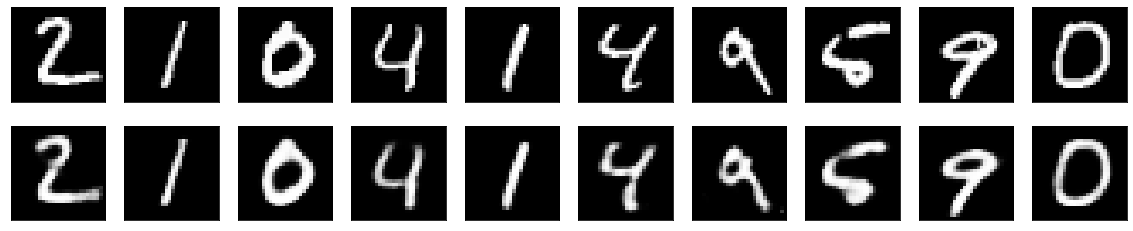

In [ ]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Comparing the input and output, we observe that $784$-dim were very well compressed into $32$-dim and then decoded into $784$.

***Question:*** While adding MLPs, we are not doing anything special we are just decreasing dimensions to 32 and increasing to original dimensions and using sigmoid for retrieving orig data. so in a NN, the data is automatically encoded to less dimensions?

***Answer:*** Yes, that is correct. We are adjusting weight so that these two are similar.

***Question:*** In real world scenario how we would determine the shape?

***Answer:***
- On training data, we can try different values of $d'$ and plot the loss.
- In the figure below, we observe that Loss drops significantly for $d'=4$.
  <img src='https://drive.google.com/uc?id=19zdjO-3h3TYxr-t7b-5r2iyM91oV-mxT'>


***Question:*** Is reducing of file size an application of auto encoders?

***Answer:***
- Yes, it could an application provided you have decoder network for converting to original data.
  <img src='https://drive.google.com/uc?id=19RbMIx3QX_-ugr07l_FZOV2E-uv8drS8'>

***Question:*** We already have t-SNE/UMAP for dimensionality reduction. Then what is advantage of using AE over these techniques?

***Answer:***
- t-SNE/UMAP preserves neighbourhood and it is used for vizualization.
- AutoEncoders, recreate the original data and it uses compression for it.
  <img src='https://drive.google.com/uc?id=1vbgrfdSUyQ3NAJNge-H48MC_eoaHdo7J'>

#### Note:

We will cover following topics in the next lecture:
1.   Denoising AE.
2.   Misc.